In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sh-data/sh-data.csv


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [32]:
# Load Data
data = pd.read_csv("/kaggle/input/sh-data/sh-data.csv")
data.drop(columns=["id", "Unnamed: 32"], errors='ignore', inplace=True)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

In [33]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Feature Selection using SelectKBest
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [48]:
# Define Preprocessing Pipeline
preprocessing_pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Select top 10 features
    ('scaler', StandardScaler())  # Scale the features
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply preprocessing pipeline
X_train = preprocessing_pipeline.fit_transform(X_train, y_train)
X_test = preprocessing_pipeline.transform(X_test)


In [52]:
data.diagnosis.unique()


array([1, 0])

In [55]:
data.diagnosis = data['diagnosis'].map({'M':1, 'B':0})


In [56]:
data.describe()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,0.0,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,NaN,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

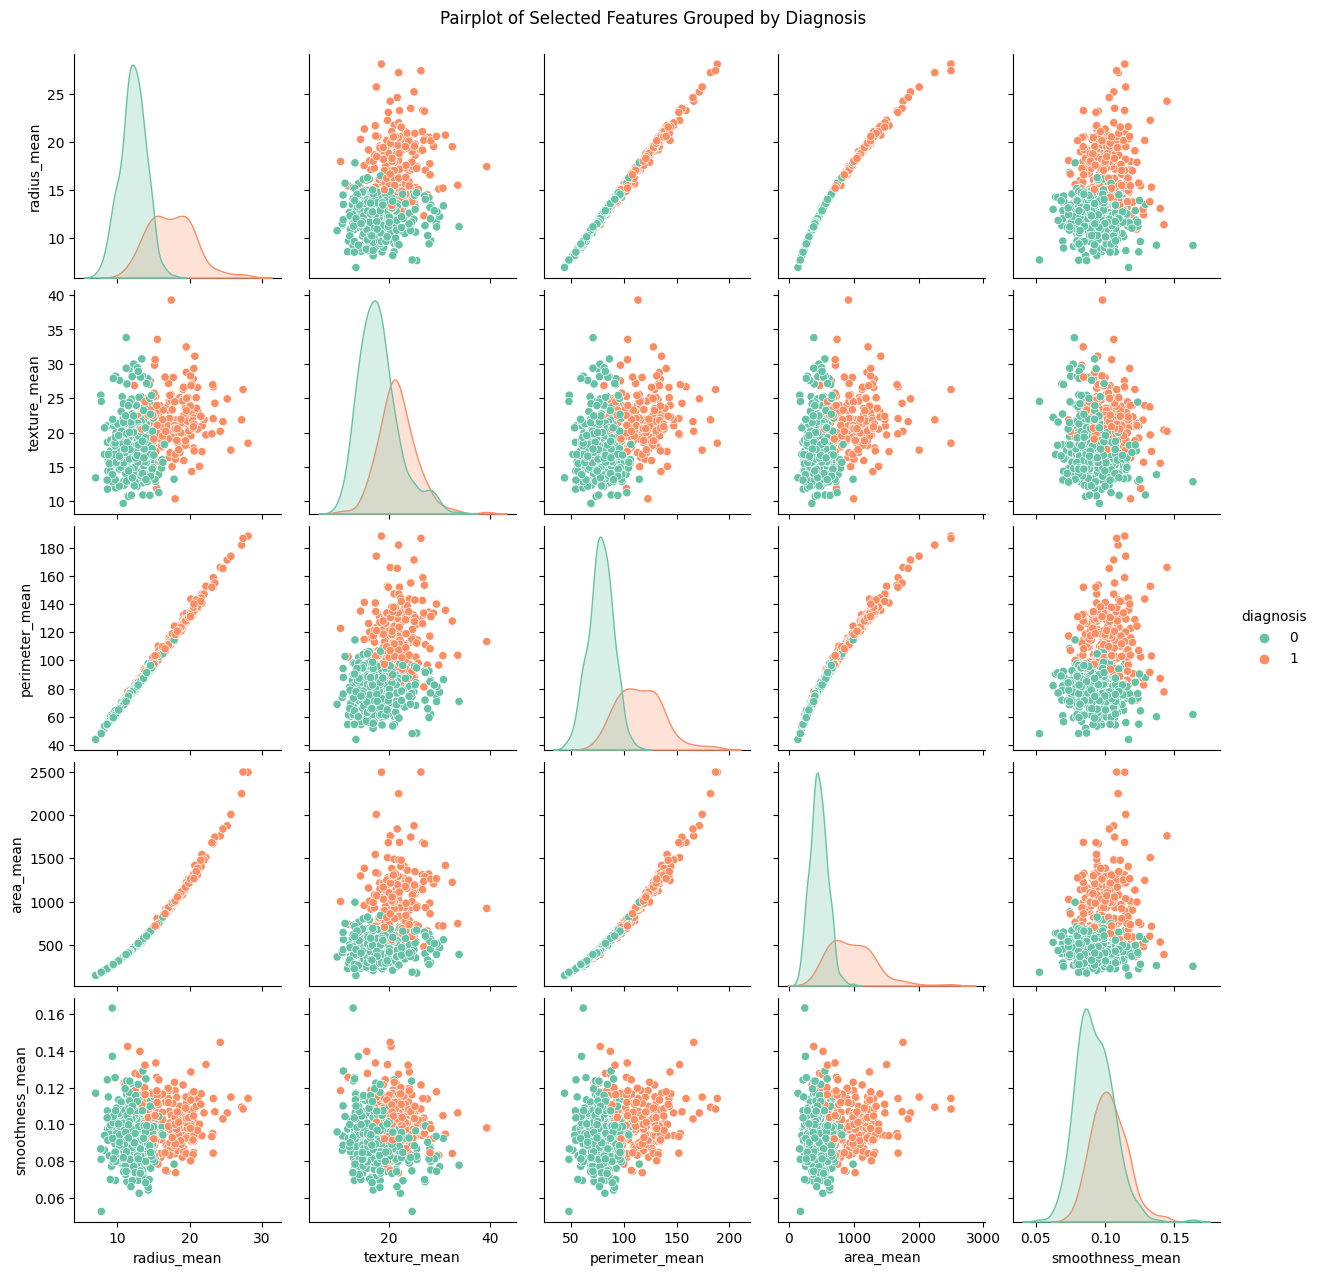

In [43]:
# Pairplot for selected features (top 5 most important features)
selected_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "diagnosis"]
pairplot_data = data[selected_features]
sns.pairplot(pairplot_data, hue="diagnosis", palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features Grouped by Diagnosis", y=1.02)
plt.show()

In [35]:
# Model Training and Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    print("Accuracy:", accuracy)
    print("AUC-ROC Score:", auc_roc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # Display confusion matrix as a table
    cm_df = pd.DataFrame(cm, columns=["Predicted Negative", "Predicted Positive"],
                          index=["Actual Negative", "Actual Positive"])
    print("Confusion Matrix:")
    print(cm_df)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    # AUC-ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("AUC-ROC Curve")
        plt.legend()
        plt.show()
    
    return {"Accuracy": accuracy, "AUC-ROC": auc_roc}

In [36]:
# Cross-validation function
def cross_validate_model(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f"Cross-validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    return scores.mean()

# Evaluate Models
results = []


Logistic Regression (Regularized):
Accuracy: 0.9298245614035088
AUC-ROC Score: 0.9751616696061141
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       108
           1       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 103                   5
Actual Positive                   7                  56


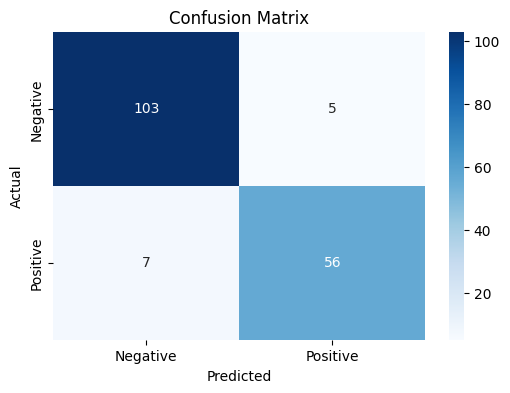

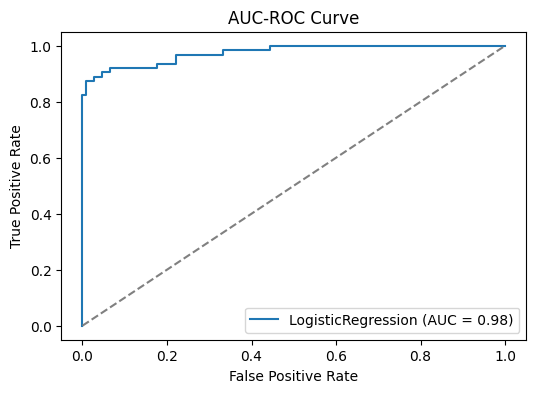

Cross-validation Accuracy Scores: [0.95       0.95       0.9625     0.91139241 0.92405063]
Mean Accuracy: 0.9396


In [37]:
# Logistic Regression with Regularization
print("\nLogistic Regression (Regularized):")
lr = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', random_state=42)
lr_metrics = evaluate_model(lr, X_train, X_test, y_train, y_test)
lr_cv_accuracy = cross_validate_model(lr, X_train, y_train)
results.append({"Model": "Logistic Regression", "Accuracy": lr_metrics["Accuracy"], "AUC-ROC": lr_metrics["AUC-ROC"], "CV Accuracy": lr_cv_accuracy})


Decision Tree (Pruned):
Accuracy: 0.9122807017543859
AUC-ROC Score: 0.8979276895943563
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       108
           1       0.91      0.84      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 103                   5
Actual Positive                  10                  53


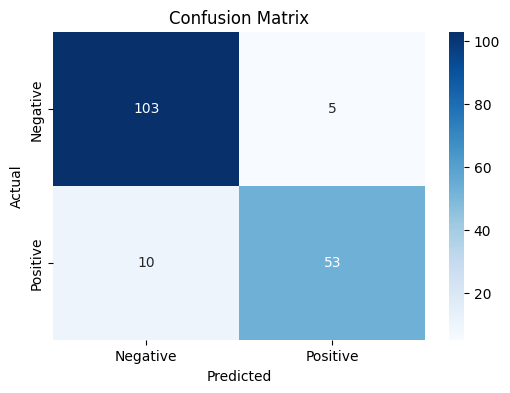

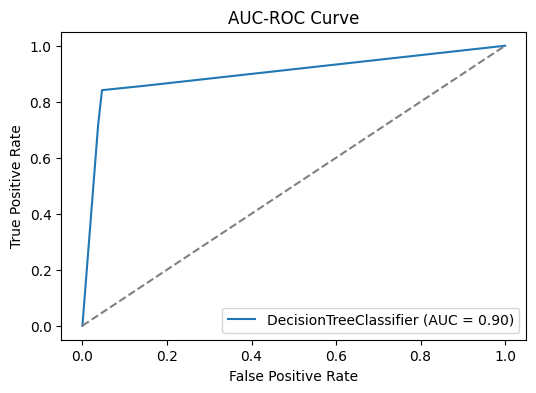

Cross-validation Accuracy Scores: [0.95       0.9625     0.95       0.92405063 0.87341772]
Mean Accuracy: 0.9320


In [38]:
# Decision Tree with Pruning
print("\nDecision Tree (Pruned):")
dt = DecisionTreeClassifier(
    max_depth=5,  # Limit the depth of the tree
    min_samples_split=10,  # Minimum number of samples required to split a node
    ccp_alpha=0.01,  # Cost-complexity pruning parameter
    random_state=42
)
dt_metrics = evaluate_model(dt, X_train, X_test, y_train, y_test)
dt_cv_accuracy = cross_validate_model(dt, X_train, y_train)
results.append({"Model": "Decision Tree", "Accuracy": dt_metrics["Accuracy"], "AUC-ROC": dt_metrics["AUC-ROC"], "CV Accuracy": dt_cv_accuracy})



Random Forest (Best Model):
Accuracy: 0.9298245614035088
AUC-ROC Score: 0.9740593768371546
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.93      0.87      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 104                   4
Actual Positive                   8                  55


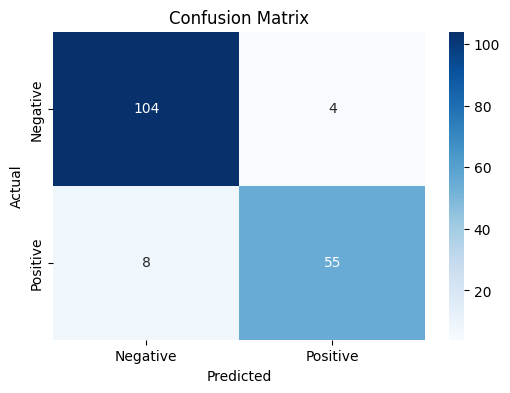

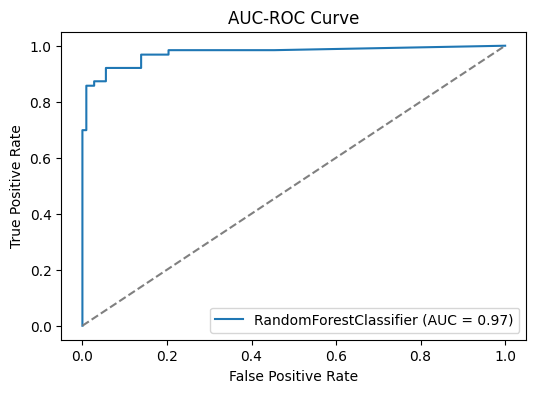

Cross-validation Accuracy Scores: [0.95       0.9625     0.9625     0.91139241 0.93670886]
Mean Accuracy: 0.9446


In [39]:
# Random Forest with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("\nRandom Forest (Best Model):")
rf_metrics = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
rf_cv_accuracy = cross_validate_model(best_rf, X_train, y_train)
results.append({"Model": "Random Forest", "Accuracy": rf_metrics["Accuracy"], "AUC-ROC": rf_metrics["AUC-ROC"], "CV Accuracy": rf_cv_accuracy})

In [64]:
# XGBoost with Early Stopping
print("\nXGBoost (Early Stopping):")
xgb_early_stopping = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5
)


XGBoost (Early Stopping):


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.935672514619883
AUC-ROC Score: 0.9671516754850089
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 105                   3
Actual Positive                   8                  55


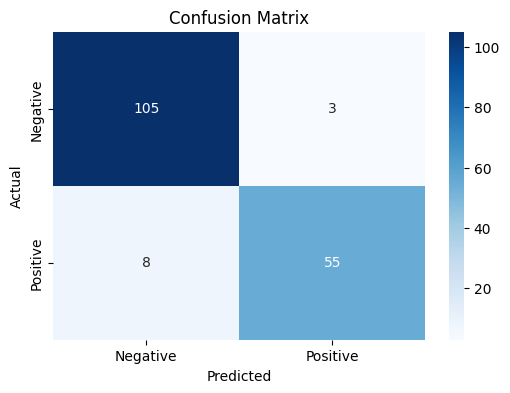

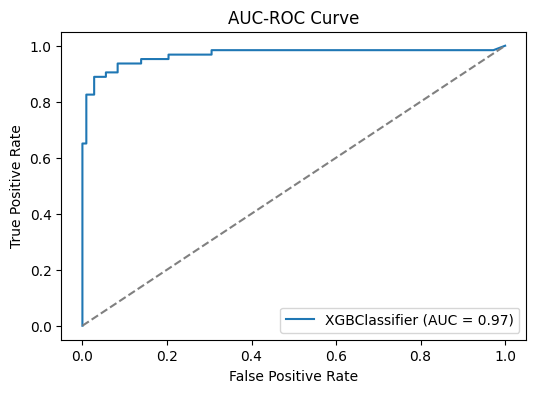

Cross-validation Accuracy Scores: [0.975      0.9625     0.9625     0.92405063 0.92405063]
Mean Accuracy: 0.9496


In [62]:
xgb_early_stopping.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
xgb_es_metrics = evaluate_model(xgb_early_stopping, X_train, X_test, y_train, y_test)
xgb_es_cv_accuracy = cross_validate_model(xgb_early_stopping, X_train, y_train)
results.append({"Model": "XGBoost (Early Stopping)", "Accuracy": xgb_es_metrics["Accuracy"], "AUC-ROC": xgb_es_metrics["AUC-ROC"], "CV Accuracy": xgb_es_cv_accuracy})


In [65]:
# Combine Results into a Table
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                      Model  Accuracy   AUC-ROC  CV Accuracy
0       Logistic Regression  0.929825  0.975162     0.939589
1             Decision Tree  0.912281  0.897928     0.931994
2             Random Forest  0.929825  0.974059     0.944620
3  XGBoost (Early Stopping)  0.935673  0.967152     0.949620
